In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('email.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.sample(5)

,Category,Message
4792,ham,Send me your resume:-)
116,ham,"As I entered my cabin my PA said, '' Happy B'd..."
5399,ham,And he's apparently bffs with carly quick now
1508,ham,"Wen ur lovable bcums angry wid u, dnt take it ..."
3288,ham,The gas station is like a block away from my h...


In [7]:
df.shape

(5572, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
#1.Data Cleaning
#2.EDA
#3.Text Prepocessing
#4.Model building
#5.Evaluation
#6.Improvment
#7.Website
#8.Deploy

## 1.Data Cleaning

In [11]:
df.rename(columns={'Category':'target','Message':'Text'},inplace=True)
df.sample(5)

,target,Text
2573,ham,"The house is on the water with a dock, a boat ..."
1934,ham,R u over scratching it?
2235,ham,What's your room number again? Wanna make sure...
1290,ham,Hey...Great deal...Farm tour 9am to 5pm $95/pa...
317,ham,Hmmm... Guess we can go 4 kb n power yoga... H...


In [13]:
df.rename(columns={'Text':'text'},inplace=True)
df.sample(5)

,target,text
5347,ham,No sir. That's why i had an 8-hr trip on the b...
118,ham,Goodo! Yes we must speak friday - egg-potato r...
2134,ham,Spoke with uncle john today. He strongly feels...
4933,ham,Match started.india &lt;#&gt; for 2
4286,ham,I pocked you up there before


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [17]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [23]:
df['target']=encoder.fit_transform(df['target'])

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [81]:
#check for duplicate value

In [29]:
df.duplicated().sum()

415

In [85]:
#remove duplicate

In [33]:
df=df.drop_duplicates(keep='first')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## 2.EDA

In [35]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [37]:
df['target'].value_counts()

target
0    4516
1     641
Name: count, dtype: int64

In [39]:
import matplotlib.pyplot as plt

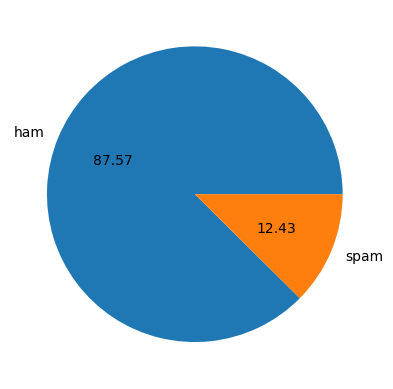

In [41]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [124]:
#data is imbalanced
!pip install nltk

In [43]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [91]:
df['num_characters']=df['text'].apply(len)

In [93]:
df.head()

,target,text,num_words,num_sentences,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [95]:
df['num_words']=df['text'].apply(lambda  x:len(nltk.word_tokenize(x)))

In [49]:
df.head()

,target,text,num_words
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15


In [97]:
df['num_sentences']=df['text'].apply(lambda  x:len(nltk.sent_tokenize(x)))

In [53]:
df.head()

,target,text,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",24,2
1,0,Ok lar... Joking wif u oni...,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,0,U dun say so early hor... U c already then say...,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1


In [99]:
df.describe()

,target,num_words,num_sentences,num_characters
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,18.560403,1.969750,79.103936
std,0.329952,13.405970,1.455526,58.382922
min,0.000000,1.000000,1.000000,2.000000
25%,0.000000,9.000000,1.000000,36.000000
50%,0.000000,15.000000,1.000000,61.000000
75%,0.000000,26.000000,2.000000,118.000000
max,1.000000,220.000000,38.000000,910.000000


In [101]:
df['target']==0

0        True
1        True
2       False
3        True
4        True
        ...  
5567    False
5568     True
5569     True
5570     True
5571     True
Name: target, Length: 5157, dtype: bool

In [103]:
#for ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [105]:
#for spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [63]:
import seaborn as sns

In [107]:
x=df[df['target']==0]
x

,target,text,num_words,num_sentences,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61
6,0,Even my brother is not like to speak with me. ...,18,2,77
...,...,...,...,...,...
5565,0,Huh y lei...,4,1,12
5568,0,Will ü b going to esplanade fr home?,9,1,36
5569,0,"Pity, * was in mood for that. So...any other s...",15,2,57
5570,0,The guy did some bitching but I acted like i'd...,27,1,125


In [109]:
y=df[df['target']==1]
y

,target,text,num_words,num_sentences,num_characters
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
5,1,FreeMsg Hey there darling it's been 3 week's n...,39,4,147
8,1,WINNER!! As a valued network customer you have...,32,5,157
9,1,Had your mobile 11 months or more? U R entitle...,31,3,154
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",31,3,136
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,18,3,90
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,38,6,158
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,35,5,160
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,30,1,147


<Axes: xlabel='num_characters', ylabel='Count'>

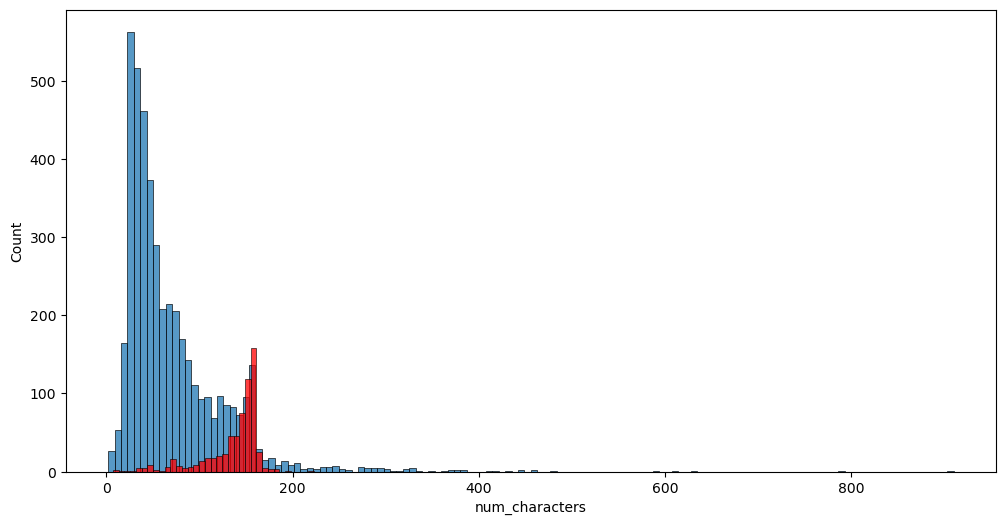

In [111]:
plt.figure(figsize=(12,6))
sns.histplot(x['num_characters'])
sns.histplot(y['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

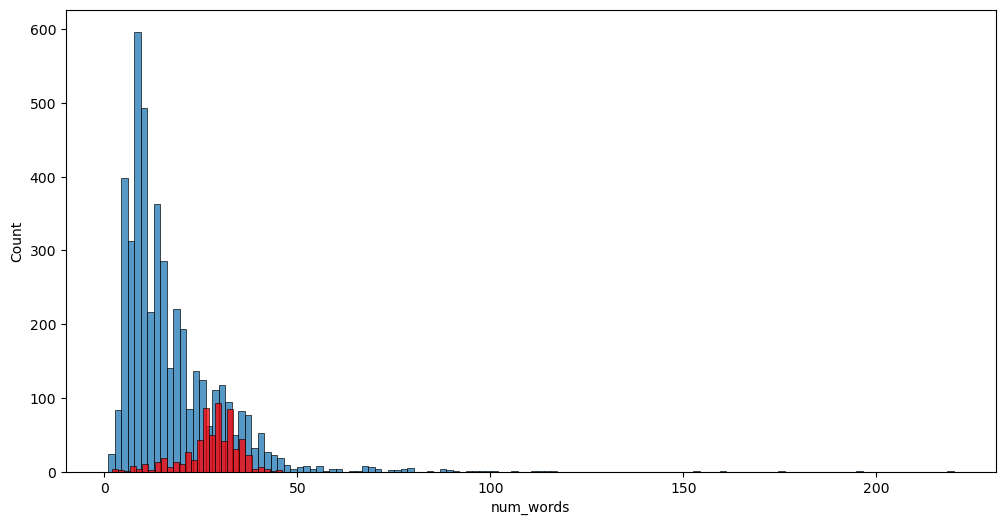

In [75]:
plt.figure(figsize=(12,6))
sns.histplot(x['num_words'])
sns.histplot(y['num_words'],color='red')


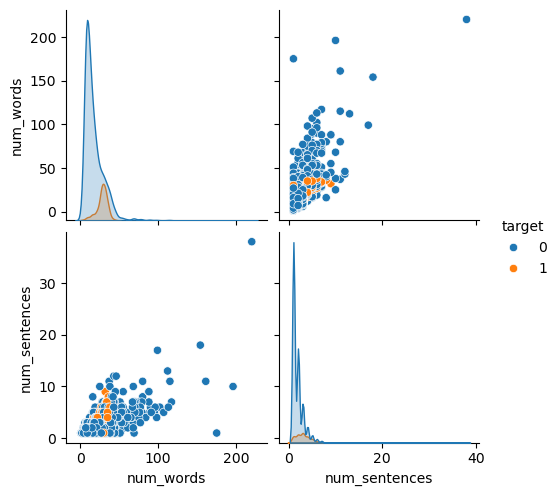

In [79]:
sns.pairplot(df,hue='target')

In [81]:
df

,target,text,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",24,2
1,0,Ok lar... Joking wif u oni...,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,0,U dun say so early hor... U c already then say...,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,4
5568,0,Will ü b going to esplanade fr home?,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",15,2
5570,0,The guy did some bitching but I acted like i'd...,27,1


In [113]:
df1=df[['target','num_characters','num_words','num_sentences']]
df1

,target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,160,35,4
5568,0,36,9,1
5569,0,57,15,2
5570,0,125,27,1


<Axes: >

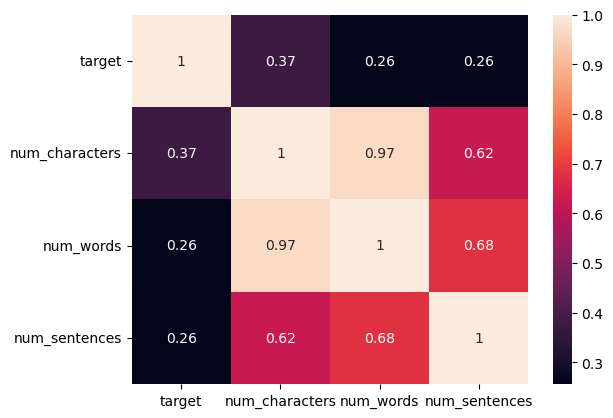

In [115]:
sns.heatmap(df1.corr(),annot=True)

## 3.Data Cleaning



In [98]:
#Lowerv Case
#Tokenization
#Removing Special Characters
#Removing stop words and punctuation
#Steaming

In [117]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [119]:
 def transfrom_text(text):
     text=text.lower()
     text=nltk.word_tokenize(text)
     y=[]
     for i in text:
         if i.isalnum():
             y.append(i)   ##removing special character
     text=y[:]
     y.clear()
     for i in text:
         if i not in stopwords.words('english') and i not in string.punctuation:
             y.append(i)
     text=y[:]
     y.clear()
     for i in text:
         if i in text:
             
             y.append(ps.stem(i))
     return " ".join(y)

In [121]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [129]:
transfrom_text("now i am playing football!!!!!")

'play footbal'

In [127]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [131]:
df['transfrom_text']=df['text'].apply(transfrom_text)

In [132]:
df.head()

,target,text,num_words,num_sentences,num_characters,transfrom_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think goe usf live around though


In [156]:
!pip install wordcloud 

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.2 kB 164.3 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.2 kB 164.3 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.2 kB 182.2 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.2 kB 182.2 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.2 kB 182.2 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/301.2 kB 151.3 kB/s eta 0:00:02
   --------- ------

In [135]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [137]:
spam_wc=wc.generate(df[df['target']==1]['transfrom_text'].str.cat(sep=" "))

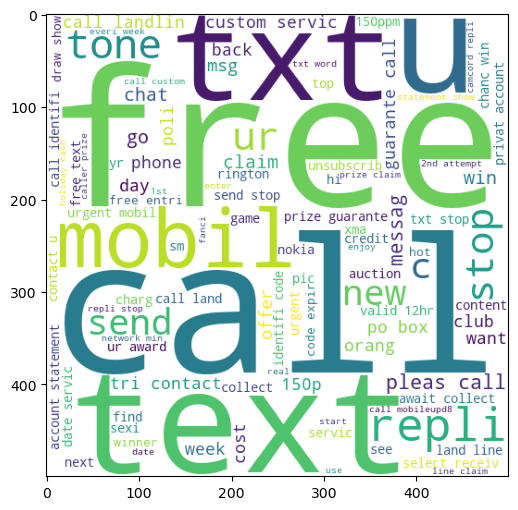

In [139]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [141]:
ham_wc=wc.generate(df[df['target']==0]['transfrom_text'].str.cat(sep=" "))

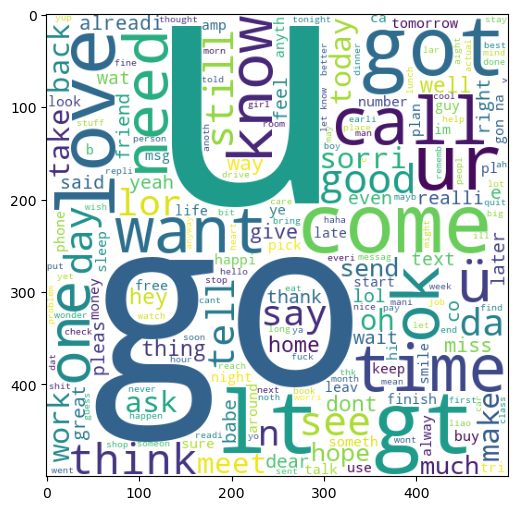

In [143]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [145]:
df.head()

,target,text,num_words,num_sentences,num_characters,transfrom_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think goe usf live around though


In [147]:
spam_corpus=[]
for msg in df[df['target']==1]['transfrom_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)


In [149]:
len(spam_corpus)

9781

In [151]:
from collections import Counter
ms=pd.DataFrame(Counter(spam_corpus).most_common(30))
ms

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


<Axes: ylabel='0'>

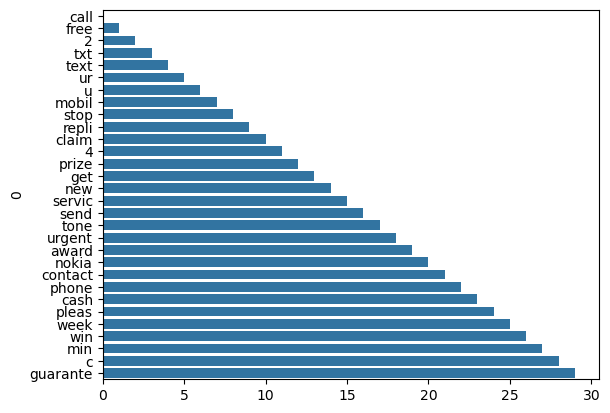

In [153]:
sns.barplot(ms[0])

In [155]:
ham_corpus=[]
for msg in df[df['target']==0]['transfrom_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)


In [216]:
len(ham_corpus)

35940

<Axes: ylabel='0'>

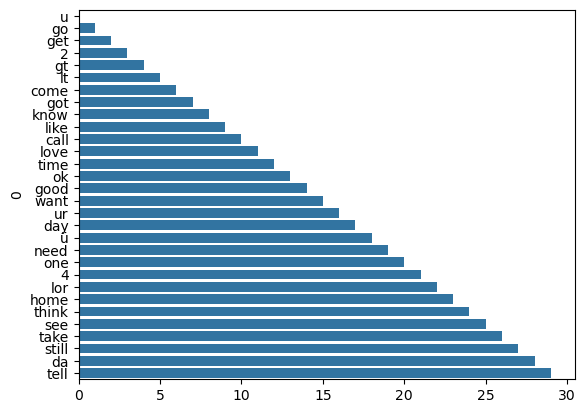

In [157]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])

In [228]:
#text vectorization 
#using beg of words
df.head()

,target,text,num_characters,num_words,num_sentences,transfrom_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4.Model Building

In [159]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [163]:
X = tfidf.fit_transform(df['transfrom_text']).toarray()

In [165]:
X.shape

(5157, 3000)

In [173]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [169]:
from sklearn.model_selection import train_test_split

In [175]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [177]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [179]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [181]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672480620155039
[[785 120]
 [ 17 110]]
0.4782608695652174


In [183]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0


In [185]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [191]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [193]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
    
}

In [195]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [197]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9757751937984496, 0.9811320754716981)

In [199]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9757751937984496
Precision -  0.9811320754716981
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9709302325581395
Precision -  1.0
For  DT
Accuracy -  0.936046511627907
Precision -  0.8210526315789474
For  LR
Accuracy -  0.9583333333333334
Precision -  0.9375
For  RF
Accuracy -  0.9728682170542635
Precision -  1.0


C:\Users\prana\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9660852713178295
Precision -  0.9423076923076923
For  BgC
Accuracy -  0.9612403100775194
Precision -  0.8918918918918919
For  ETC
Accuracy -  0.9777131782945736
Precision -  0.9905660377358491
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9764705882352941


In [201]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [202]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.970930,1.000000
5,RF,0.972868,1.000000
8,ETC,0.977713,0.990566
0,SVC,0.975775,0.981132
9,GBDT,0.955426,0.976471
6,AdaBoost,0.966085,0.942308
4,LR,0.958333,0.937500
7,BgC,0.961240,0.891892
3,DT,0.936047,0.821053


In [203]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [204]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912791
1,NB,Accuracy,0.970930
2,RF,Accuracy,0.972868
3,ETC,Accuracy,0.977713
4,SVC,Accuracy,0.975775
5,GBDT,Accuracy,0.955426
6,AdaBoost,Accuracy,0.966085
7,LR,Accuracy,0.958333
8,BgC,Accuracy,0.961240
9,DT,Accuracy,0.936047


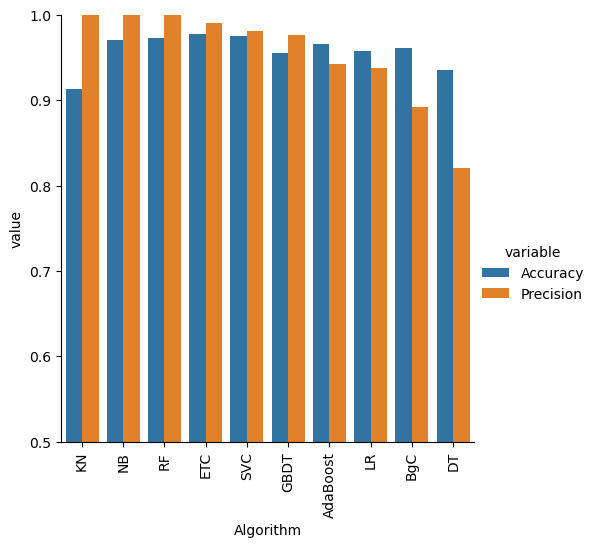

In [205]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [206]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [207]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [208]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [209]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [210]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [211]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000
1,NB,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000
2,RF,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000
3,ETC,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566
4,SVC,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132
5,GBDT,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471
6,AdaBoost,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308
7,LR,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500
8,BgC,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892
9,DT,0.936047,0.821053,0.936047,0.821053,0.936047,0.821053,0.936047,0.821053


In [212]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [226]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [228]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [229]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 1.0


In [230]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [234]:
from sklearn.ensemble import StackingClassifier

In [236]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))